<h1 align="center">Biblioteca de Cálculo Numérico</h1>

Integrantes do trio:
* Carlos Bravo: 119136241
* Gabrielly de Andrade: 116149740
* Markson: X

Essa é uma biblioteca ... disciplina calcnum ... aqui vai ter explicações e exemplos do nosso código show

In [18]:
include("NumericalCalculus.jl");

In [3]:
# Utilizando plotagem disponível em: http://mth229.github.io/graphing.html

import Pkg; Pkg.add("Plots")
using Plots
theme(:lime)

    Updating registry at `C:\Users\gabrielly.andrade\.julia\registries\General.toml`
   Resolving package versions...
   Installed Libtiff_jll ─ v4.3.0+1
   Installed LERC_jll ──── v3.0.0+1
  No Changes to `C:\Users\gabrielly.andrade\.julia\environments\v1.7\Project.toml`
    Updating `C:\Users\gabrielly.andrade\.julia\environments\v1.7\Manifest.toml`
  [88015f11] + LERC_jll v3.0.0+1
  [89763e89] ↑ Libtiff_jll v4.3.0+0 ⇒ v4.3.0+1
Precompiling project...
  ✓ LERC_jll
  ✓ Libtiff_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  5 dependencies successfully precompiled in 85 seconds (129 already precompiled)


## 1. Aproximação de valor

Esse tópico refere-se ao problema 

> 2. Problema: Achar um valor aproximado de uma função com informações de derivadas

### 1.1 Introdução

Dado uma função, queremos descobrir o seu valor aproximado em um determinado ponto. Isso pode ser um problema muito complicado para se calcular na mãoe podemos utilizar o série de Taylor tal que a cada vez eu adiciono um novo termo na sequência eu me aproximo cada vez mais do valor real.

Vamos testar com alguns exemplos da biblioteca.

### 1.2 Primeiro exemplo

Vamos aproximar $sen(0.01)$

Repare que temos valores conhecidos para $sen$ pela tabela trigonométrica

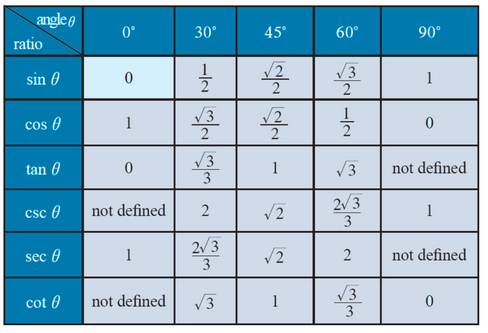

Se quiséssemos calcular na mão, seria muito trabalhoso aproximar **0.01**. Felizmente, podemos utilizar nossa biblioteca para calcular essa aproximação.

O nome da função é **value_approximation**, vamos explorá-la

In [9]:
?value_approximation

search: value_approximation



## Objetivo

Achar um valor aproximado de uma função com informações de derivadas utilizando o método de Taylor

## Especificação

|y - f(x)|<= E

## Parâmetros de entrada

```
x : Number
    Valor aproximado que queremos calcular a aproximação em y (f(x))

a : Number
    Ponto fixo que será calculado a aproximação
    Idealmente é próximo de x e é conhecida as derivadas no ponto

derivatives : Array{Number}
    Vetor com informações das derivadas no ponto a: f(a), f'(a), f''(a) ...

M: Number
    Maior valor da n-derivada no intervalo (teto)

n: Int64, optional
    Número de termos do polinômio de Taylor
    Se nenhum valor for passado será calculado o polinômio de ordem 2
```

## Retorno

```
y : Flotat64
    Retorna o valor aproximado de f(x)

E : Float64
    Retorna o erro da aproximação
```

## Exceções

```
AssertionError
    Caso a quantidade de derivadas no vetor seja insuficiente para realizar o 
    cálculo, levanta exeção de domínio
```


Vendo o contrato da função, precisamos 4 parâmetros obrigatórios. Repare que a função sen(x) oscila entre 1 e -1, portanto sua derivada tem um teto de no máximo 1

In [24]:
# Exemplo 1.1 com ordem = 3

f1_1(x) = sin(x)
df1_1(x) = cos(x)
d2f1_1(x) = -sin(x)
d3f1_1(x) = -cos(x)

# Parâmetros obrigatórios
x_1_1 = 0.01
a_1_1=0
derivates_1_1 = [f1_1(a_1_1), df1_1(a_1_1), d2f1_1(a_1_1), d3f1_1(a_1_1)]
M_1_1 = 1

# Parâmetro opcional

ordem_1_1 = 3


value_approximation(x_1_1, a_1_1, derivates_1_1, M_1_1, ordem_1_1)

(0.009999833333333333, 4.166666666666667e-10)

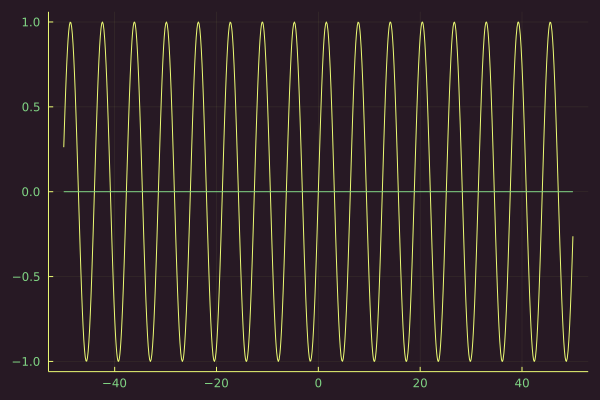

In [25]:
f1_1(x) = sin(x)
plot(f, -50, 50, legend=false) 
plot!(zero)

### 1.2 Segundo exemplo

Vamos aproximar $cos(0.90)$.

Repare que é um pouco parecido com o exemplo anterior, mas dessa vez vamos utilizar a ordem = 2 como padrão

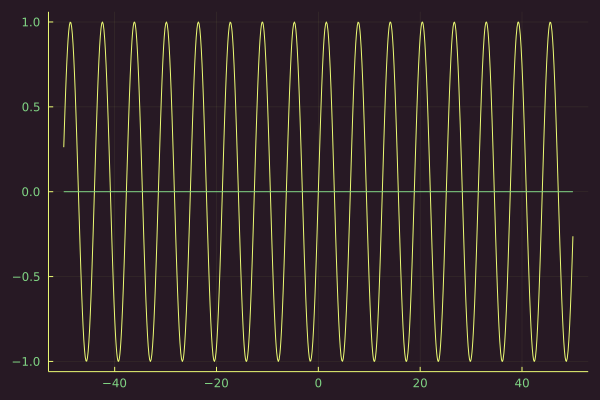

In [26]:
f_1_2(x) = cos(x)
plot(f, -50, 50, legend=false) 
plot!(zero)

In [27]:
# Exemplo 1.2 com ordem padrão = 2

f1_2(x) = cos(x)
df1_2(x) = -sin(x)
d2f1_2(x) = -cos(x)

# Parâmetros obrigatórios
x_1_2 = 0.90
a_1_2=0
derivates_1_2 = [f1_2(a_1_2), df1_2(a_1_2), d2f1_2(a_1_2)]
M_1_2 = 1


value_approximation(x_1_2, a_1_2, derivates_1_2, M_1_2)

(0.595, 0.12150000000000001)

### 1.3 Terceiro exemplo

Vamos aproximar $ln(1.5)$.

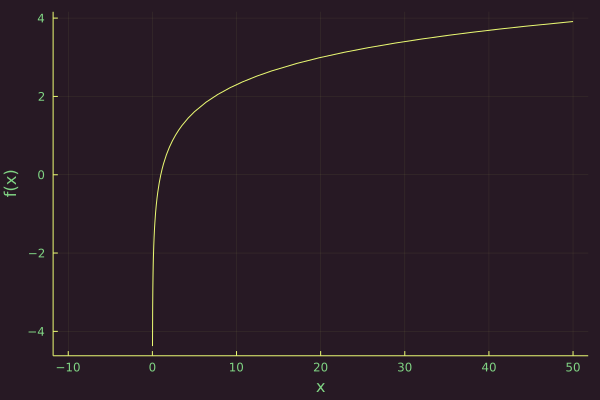

In [30]:
ln(x) = log(ℯ, x)

plot(ln, -10, 50, legend=false)
xlabel!("x")
ylabel!("f(x)")

In [37]:
# Exemplo 1.3 com ordem = 3

f1_3(x) = ln(x)
df1_3(x) = 1/x
d2f1_3(x) = -1/(x^2)
d3f1_3(x) = 2/(x^3)

# Parâmetros obrigatórios
x_1_3 = 1.5
a_1_3=1
derivates_1_3 = [f1_3(a_1_3), df1_3(a_1_3), d2f1_3(a_1_3), d3f1_3(a_1_3)]
M_1_3 = 1


value_approximation(x_1_3, a_1_3, derivates_1_3, M_1_3, 3)

(0.4166666666666667, 0.0026041666666666665)

## 2. Aproximação de raiz de função

Esse tópico refere-se ao problema 

> 3. Problema: Encontrar raíz aproximadamente

### 2.1 Introdução

Dado uma função, queremos descobrir o seu valor aproximado em um determinado ponto. Isso pode ser um problema muito complicado para se calcular na mãoe podemos utilizar o série de Taylor tal que a cada vez eu adiciono um novo termo na sequência eu me aproximo cada vez mais do valor real.

Vamos testar com alguns exemplos da biblioteca.

### 2.2 Primeiro exemplo

Vamos aproximar $\sqrt[3]{43}$ 

Se quiséssemos calcular na mão, seria muito trabalhoso aproximar esse valor. Felizmente, podemos utilizar nossa biblioteca para calcular essa aproximação.

O nome da função é **find_root**, vamos explorá-la

In [39]:
?find_root

search: find_root



## Objetivo

Encontrar zero de função (raiz) para calcular aproximação de valores numéricos com o método da Bisseção. Retorna um aviso caso o intervalo passado pelo usuário não possua sinais trocados.

## Especificação

f(r)=0 e |x-r| <= erro

## Parâmetros

```
f : Function
    Recebe uma função 

a : Number
    Início do intervalo
    Obrigatório caso o método seja Bisseção

b : Number
    Fim do intervalo
    Obrigatório caso o método seja Bisseção

error: Number
    Erro no domínio
    Obrigatório caso o método seja Bisseção

method: String, optional
    Método que será aplicado a aproximação da raiz da função (:bisecion ou :newton)
    Caso nenhum método seja escolhido o padrão é o da Bisseção
```

## Retorno

```
root : Float64
    Retorna uma aproximação para a raiz calculada pelo método da Bisseção
```

## Exceções

```
AssertionError
    Caso o intervalo passado não tenha troca de valores no intervalo (sinais opostos) para o método da Bisseção
```

---

## Objetivo

Encontrar zero de função (raiz) para calcular aproximação de valores numéricos com o método de Newton

## Especificação

f(r)=0

## Parâmetros

```
f : Function
    Recebe uma função 

derivative: Function
    Derivada da função f

qtty_iterations: Int64, optional
    Quantidade de interações para ser utilizada no método 
    Caso nenhum valor seja passado será calculado 10 iterações

kick: Float64
    Chute da função inicial para começar a aplicar o método

method: String, optional
    Método que será aplicado a aproximação da raiz da função (:bisecion ou :newton)
    Caso nenhum método seja escolhido o padrão é o da Bisseção
```

## Retorno

```
root : Float64
    Retorna uma aproximação para a raiz calculada pelo método de Newton
```


Para aproximar $\sqrt[3]{43}$ temos que pensar em um número tal que $x^3 = 43$, ou seja, podemos pensar em uma função $f(x) = x^3 - 43$.

Vamos utilizar no primeiro exemplo o método de Newton para calcular essa aproximação

In [40]:
# Exemplo 2.1 

# Passo 1: definir a função que queremos aproximar
f_2_1(x) = x^3 - 43

# Passo 2: escolher um chute (valor arbitrário, de preferência que se aproxime do zero da função)

chute_2_1 = 4

# Passo 3: derivar f

derivada_f_2_1(x) = 3x^2

find_root(f_2_1, derivada_f_2_1, chute_2_1)

3.5033980603867243

### 2.3 Segundo exemplo

Agora, vamos aproximar o mesmo valor $\sqrt[3]{43}$, mas dessa vez utilizando o método da bisseção.

Podemos perceber pela documentação da função que podemos passar novos parâmetros para utilizar esse método.
Dessa vez temos que passar além da função um intervalo e um erro.
 

In [42]:
# Exemplo 2.2

find_root(f_2_1, big"-100", big"100", 10^-2)

3.5003662109375

Repare que caso não tivesse sinais trocados no intervalo teríamos recebido um aviso como no exemplo abaixo

In [43]:
# Exemplo 2.2

find_root(f_2_1, big"10", big"100", 10^-2)

LoadError: AssertionError: Aviso!! A função no intervalo passado [10, 100] não possui sinais opostos

### 2.4 Terceiro exemplo

Vamos aproximar $ln(3)$, utilizando o método da bisseção com um erro de $10^{-3}$

 

Como sabemos calcular $e^x$ podemos utilizar a seguinte relação:

$e^{ln(3)} = e^{x}$ e teremos a relação $x = ln(3)$ que é o que queremos encontrar.


Repare que pela propriedade $ln(e^c) = c$, teremos $ln(e^x) = x$, onde $e^x = 3$

Escrevendo em forma de função e considerando as demais informações no enunciado, temos:

- Função: $f(x) = e^x - 3$
- Erro: $10^{-3}$

Utilizando a função, teremos


In [45]:
f_2_3(x) = exp(x) - 3

find_root(exp(x) - 3, 0, 10, 10^(-3))

LoadError: UndefVarError: x not defined

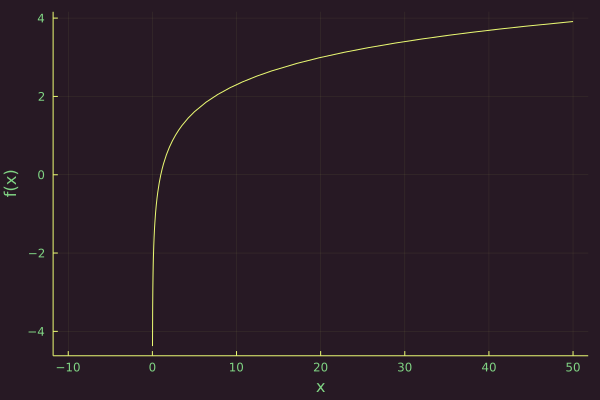

In [44]:
ln(x) = log(ℯ, x)

plot(ln, -10, 50, legend=false)
xlabel!("x")
ylabel!("f(x)")

In [ ]:
# Exemplo 2.3

find_root(ln, big"10", big"100", 10^-2)

## ?. Decomposição LU

Dada uma matriz quadrada $A$ de tamanho $(n,n)$, é possível realizar sua decomposição LU. A decomposição consiste em uma matriz $L$ triangular inferior e uma matriz $U$ triangular superior tal que $A=LU$. O método _lu\_decomposition(matrix)_ recebe uma matriz $A$ e retorna as matrizes $L$ e $U$ de sua decomposição.

### Exemplos

In [15]:
# Exemplo 1: Matriz diagonal

A = Float64.([
    1 0 0;
    0 2 0;
    0 0 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

In [17]:
# Exemplo 2: Matriz triangular inferior

A = Float64.([
    1 0 0;
    5 2 0;
    8 1 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 5.0  1.0  0.0
 8.0  0.5  1.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 5.0  2.0  0.0
 8.0  1.0  4.0

In [18]:
# Exemplo 3: Matriz triangular superior

A = Float64.([
    1 7 2;
    0 2 9;
    0 0 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Matrix{Float64}:
 1.0  7.0  2.0
 0.0  2.0  9.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  7.0  2.0
 0.0  2.0  9.0
 0.0  0.0  4.0

In [19]:
# Exemplo 4: Matriz densa

A = Float64.([
    1 2 3;
    5 2 9;
    8 1 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0    0.0
 5.0  1.0    0.0
 8.0  1.875  1.0

3×3 Matrix{Float64}:
 1.0   2.0   3.0
 0.0  -8.0  -6.0
 0.0   0.0  -8.75

3×3 Matrix{Float64}:
 1.0  2.0  3.0
 5.0  2.0  9.0
 8.0  1.0  4.0

## ?. Derivada contínua

In [1]:
function continuous_derivative(f, x, h, option=:center)
    @assert(option == :front || option == :back || option == :center, "Opcao invalida, entre com :front, :back ou :center")
    if(option == :front) return (f(x+h) - f(x))/h end
    if(option == :back) return (f(x) - f(x-h))/h end
    if(option == :center) return (f(x+h) - f(x-h))/2h end
end

continuous_derivative (generic function with 2 methods)

In [8]:
f(x) = x^2
continuous_derivative(f, 2, 1e-2, :fsdfront)

LoadError: AssertionError: Invalid option, possible options are: :front, :back, and :center